# 3. RS CVn Stars Spectral Energy Distributions

## 3.1. Notebook setup

In [1]:
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## 3.2. <a href="https://www.dropbox.com/s/28nvpwlzlq6eoni/rs-cvn_seds.zip?dl=1">Download data</a>

Unzip the contents into a folder named <font color='green'>data</font> in the same level as the notebooks folder. The directory structure should end up looking like the following: 
```
thermal-gs
├── data
│   ├── HR1099_data.txt
│   ├── HR1099_I_models.txt
│   ├── HR1099_V_models.txt
│   ├── model_sed_freqs.txt
│   ├── thermal-gs.mplstyle
│   ├── UXArietis_data.txt
│   ├── UXArietis_I_models.txt
│   ├── UXArietis_V_models.txt
│   ├── ...
├── figures
│   ├── HR1099_SED.pdf
│   ├── HR1099_SED.png
│   ├── UXArietis_SED.pdf
│   ├── UXArietis_SED.png
│   ├── ...
├── notebooks
│   ├── rs-cvn_seds.ipynb
│   ├── ...
.
.
.

## 3.3. HR1099

### 3.3.1. Load

In [2]:
freqs_model = np.loadtxt('../data/model_sed_freqs.txt').T
I_models = np.loadtxt('../data/HR1099_I_models.txt')
V_models = np.loadtxt('../data/HR1099_V_models.txt')
freqs_obs, I_obs, sI_obs, V_obs, sV_obs = np.loadtxt('../data/HR1099_data.txt', unpack=True)

plt.style.use('../data/thermal-gs.mplstyle')

### 3.3.2. Plot

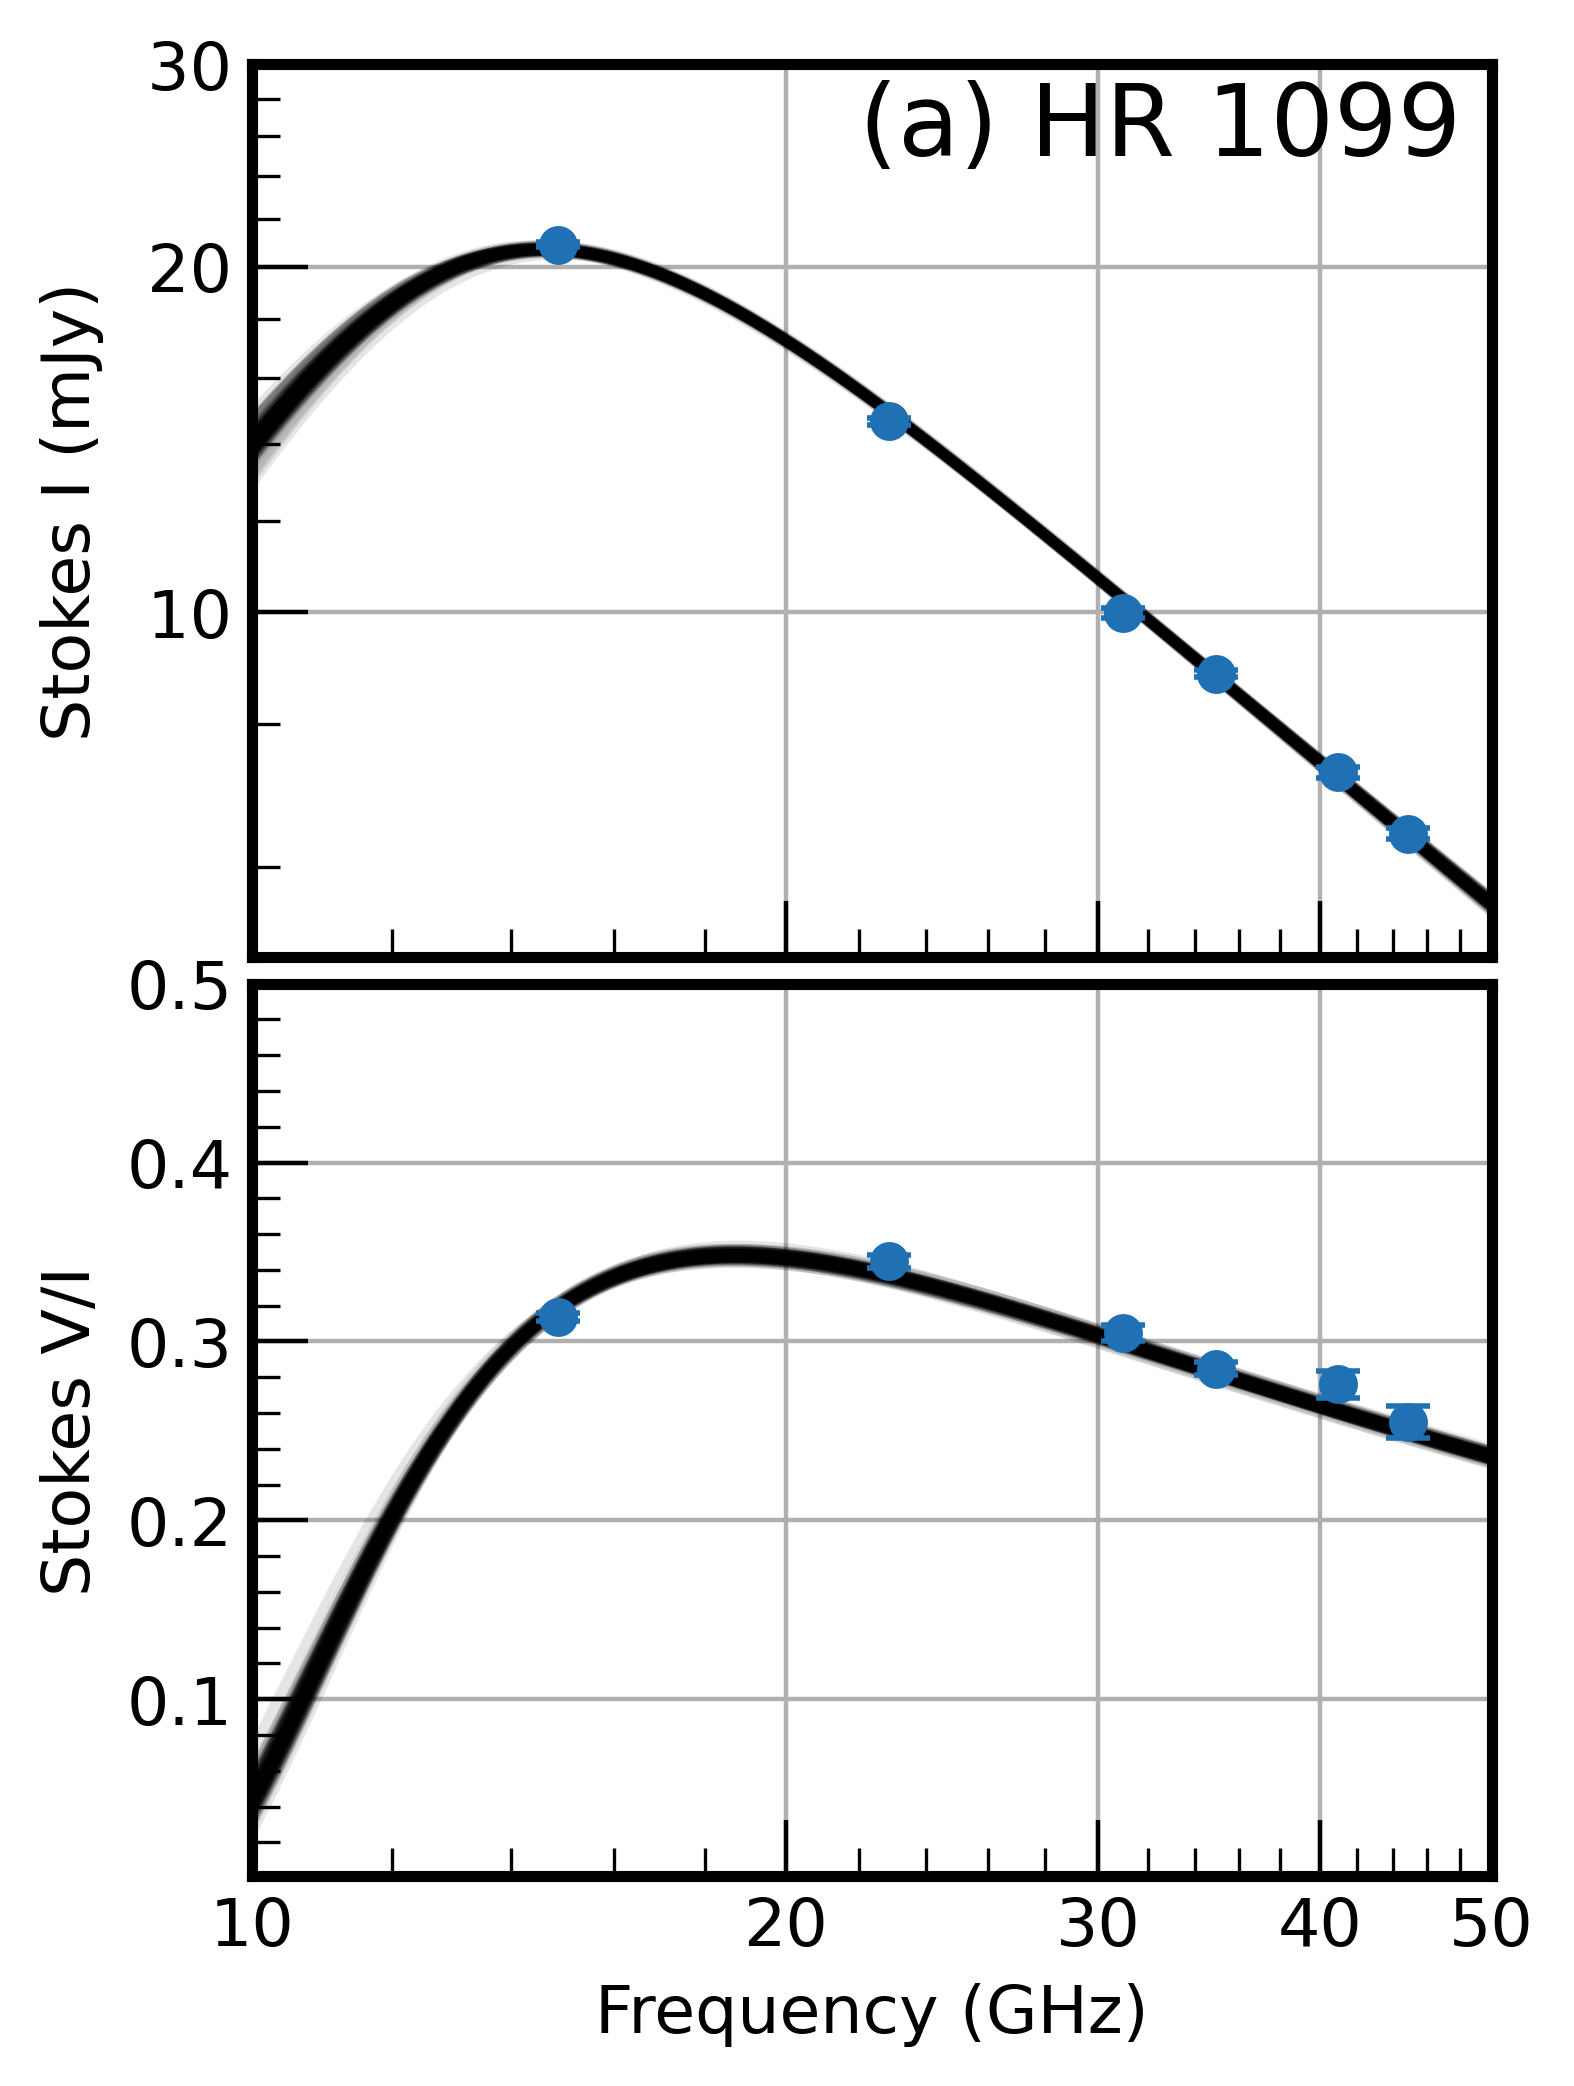

In [3]:
fig,ax = plt.subplots(2, 1, figsize=(4, 6), sharex=True)
fig.subplots_adjust(hspace=0.03, wspace=0.3)
cmap = mpl.cm.get_cmap('Blues')

# Stokes I  
ax[0].set_ylabel('Stokes I (mJy)')
ax[0].set_xlim(10, 50)
ax[0].set_ylim(5.01, 30)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))
ax[0].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[0].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[0].yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=3, subs=[1, 2, 3, 4, 5]))
ax[0].yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=15, subs=np.arange(1, 15)*0.2))
ax[0].grid()

for i in range(len(I_models)):
    ax[0].plot(freqs_model, I_models[i], color='black', alpha=0.1)
ax[0].errorbar(freqs_obs, I_obs, yerr=sI_obs, color=cmap(0.75), marker='o', linestyle='')

# Stokes V/I
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('Stokes V/I')
ax[1].set_ylim(0.001, 0.5)

ax[1].set_xscale('log')
ax[1].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[1].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[1].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[1].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax[1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax[1].grid()

for i in range(len(V_models)):
    ax[1].plot(freqs_model, V_models[i]/I_models[i], color='black', alpha=0.1)
ax[1].errorbar(freqs_obs, V_obs/I_obs, yerr=np.sqrt((sI_obs/I_obs)**2+(sV_obs/V_obs)**2)*np.abs(V_obs/I_obs), 
    color=cmap(0.75), marker='o', linestyle='')

# Final setup
ax[0].text(22, 25, '(a) HR 1099', fontsize=18) 
fig.set_facecolor('white')
plt.savefig('../figures/HR1099_SED.png', bbox_inches='tight')
plt.savefig('../figures/HR1099_SED.pdf', bbox_inches='tight')
plt.show()

## 3.4. UX Arietis

### 3.4.1. Load

In [4]:
I_models = np.loadtxt('../data/UXArietis_I_models.txt')
V_models = np.loadtxt('../data/UXArietis_V_models.txt')
freqs_obs, I_obs, sI_obs, V_obs, sV_obs = np.loadtxt('../data/UXArietis_data.txt', unpack=True)

### 3.4.2. Plot

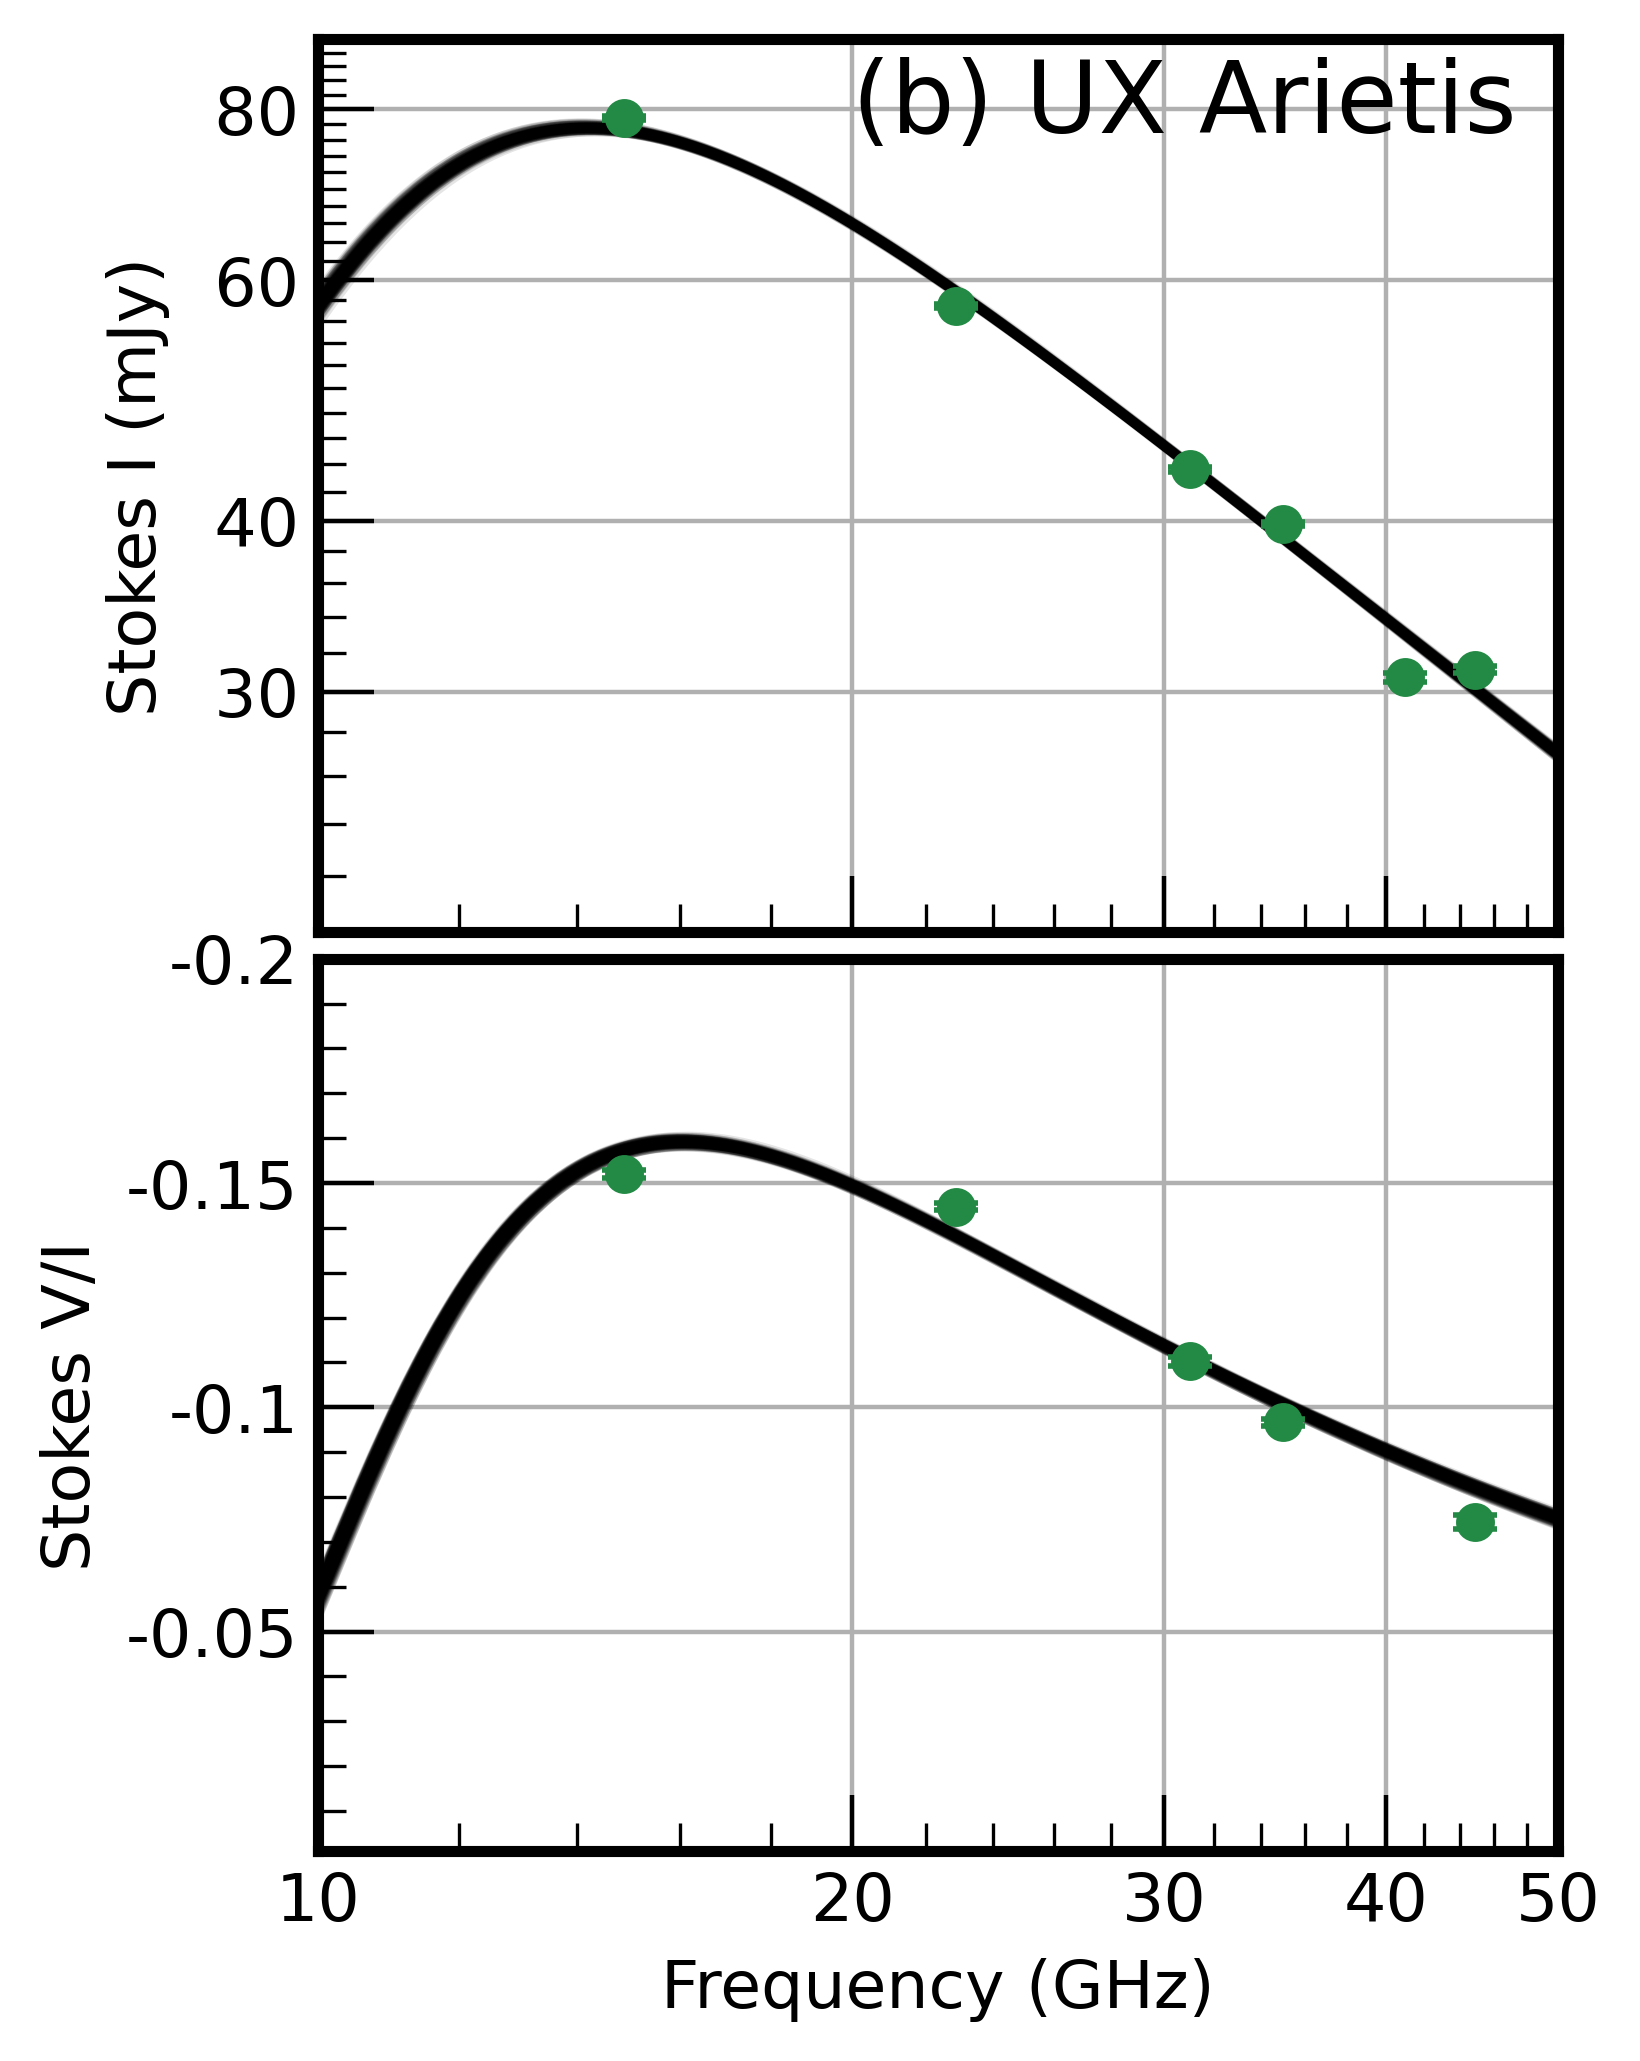

In [5]:
fig,ax = plt.subplots(2, 1, figsize=(4, 6), sharex=True)
fig.subplots_adjust(hspace=0.03, wspace=0.3)
cmap = mpl.cm.get_cmap('Greens')

# Stokes I  
ax[0].set_ylabel('Stokes I (mJy)')
ax[0].set_xlim(10, 50)
ax[0].set_ylim(20.01, 90)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))
ax[0].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[0].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[0].yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[2, 3, 4, 6, 8]))
ax[0].yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=43, subs=np.arange(2, 45)*0.2))
ax[0].grid()

for i in range(len(I_models)):
    ax[0].plot(freqs_model, I_models[i], color='black', alpha=0.1)
ax[0].errorbar(freqs_obs, I_obs, yerr=sI_obs, color=cmap(0.75), marker='o', linestyle='')

# Stokes V/I
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('Stokes V/I')
ax[1].set_ylim(-0.001, -0.2)

ax[1].set_xscale('log')
ax[1].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[1].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[1].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[1].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
ax[1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
ax[1].grid()

for i in range(len(V_models)):
    ax[1].plot(freqs_model, V_models[i]/I_models[i], color='black', alpha=0.1)
ax[1].errorbar(freqs_obs, V_obs/I_obs, yerr=np.sqrt((sI_obs/I_obs)**2+(sV_obs/V_obs)**2)*np.abs(V_obs/I_obs), 
    marker='o', color=cmap(0.75), linestyle='')

# Final setup
ax[0].text(20, 77, '(b) UX Arietis', fontsize=18) 
fig.set_facecolor('white')
plt.savefig('../figures/UXArietis_SED.png', bbox_inches='tight')
plt.savefig('../figures/UXArietis_SED.pdf', bbox_inches='tight')
plt.show()